In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import os

def NB(x):
    return np.log(1+x)/x
def term(x):
    return (np.sqrt(1+2*x)-1)/x

cosm = 'fiducial'
simnum = 0
ns = 10000
rbin = 8
rmin, rmax = 3., 25.
njk = 10
#filename = f'../data/vpfdata_{rmin}-{rmax}-{rbin}-{njk}-{ns}-{cosm}-{simnum}.dat'
filedir = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/output/'

filelist = os.listdir(filedir)
nsim = len(filelist)
print(nsim)

chis = []

# Read all files
for file in filelist:
    data = ascii.read(filedir+file)
    chis.append( data['chi'] )

# Calculate the covariance summation and covariance proper
covsum = np.zeros((rbin,rbin))
chis_mean = np.mean(chis,axis=0)
for i in range(rbin):
    for j in range(rbin):
        for k in range(nsim):
            a = (chis[k][i]-chis_mean[i])
            b = (chis[k][j]-chis_mean[j])
            covsum[i][j] += a*b
# for i in range(rbin):
#     for k in range(nsim):
#         covsum[i]+=(chis[k]-chis_mean)*(chis[k]-chis_mean)
cov = covsum/(nsim-1)


2713


In [3]:

# Calculate chi squared
chisq = np.zeros(nsim)
for i in range(nsim):
    a = np.transpose(np.asarray(chis[i])-chis_mean)
    b = (np.asarray(chis[i])-chis_mean)
    c = np.linalg.inv(cov)
    ac = np.dot(a,c)
    chisq[i] = ( np.dot(ac,b) )


In [3]:
c


array([[  515782.6776175 ,  -299142.07163988,   -29330.55712886,
           -4419.11768888,   -33861.70888618,    48459.69094263,
          -32810.91977518,     4735.45272175],
       [ -299142.07163988,   962504.05297927,  -494948.3309671 ,
          -53613.4225395 ,    75908.90644587,   -34298.5880425 ,
            9224.94000803,    -4530.83065776],
       [  -29330.55712886,  -494948.3309671 ,  1571345.47376172,
         -866904.82579165,  -119968.51067217,    67290.14563347,
           10595.56122704,     8199.54088023],
       [   -4419.11768888,   -53613.4225395 ,  -866904.82579165,
         2601281.20756567, -1546749.82827279,     8208.77256187,
          114701.85766257,   -17604.37358091],
       [  -33861.70888618,    75908.90644587,  -119968.51067217,
        -1546749.82827279,  3735704.22158623, -1986618.0608447 ,
          122254.70489218,    10979.56248756],
       [   48459.69094263,   -34298.5880425 ,    67290.14563347,
            8208.77256187, -1986618.0608447 ,  315

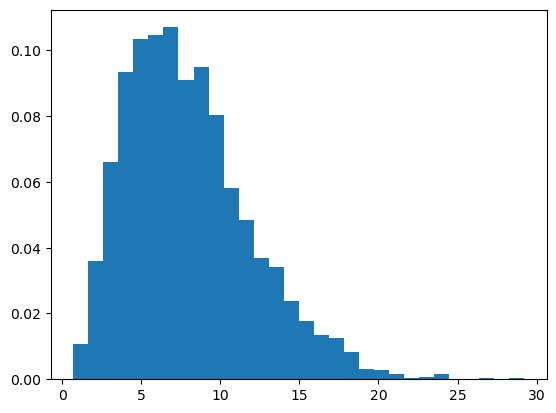

In [4]:

plt.hist(np.asarray(chisq).flatten(),bins=30,color=['C00'],density=True)
#plt.vlines(0.5,0,.6,ls=':',color='k')
plt.show()


In [13]:
cov

array([[2.90417850e-06, 1.29045834e-06, 7.58138410e-07, 5.35629673e-07,
        3.78858561e-07, 3.68871590e-07, 4.21935532e-07, 3.42356723e-07],
       [1.29045834e-06, 1.98559631e-06, 9.67457601e-07, 5.91090056e-07,
        3.60964604e-07, 3.71317890e-07, 2.59186437e-07, 2.35280165e-07],
       [7.58138410e-07, 9.67457601e-07, 1.40851720e-06, 8.53536901e-07,
        6.07798181e-07, 5.56559036e-07, 4.87914959e-07, 4.34867020e-07],
       [5.35629673e-07, 5.91090056e-07, 8.53536901e-07, 1.21416830e-06,
        9.36610192e-07, 9.06282221e-07, 8.88261962e-07, 1.06260382e-06],
       [3.78858561e-07, 3.60964604e-07, 6.07798181e-07, 9.36610192e-07,
        1.33547741e-06, 1.36451614e-06, 1.45915484e-06, 1.73155434e-06],
       [3.68871590e-07, 3.71317890e-07, 5.56559036e-07, 9.06282221e-07,
        1.36451614e-06, 1.97268144e-06, 2.24921630e-06, 2.78926352e-06],
       [4.21935532e-07, 2.59186437e-07, 4.87914959e-07, 8.88261962e-07,
        1.45915484e-06, 2.24921630e-06, 3.68839081e-06, 5.

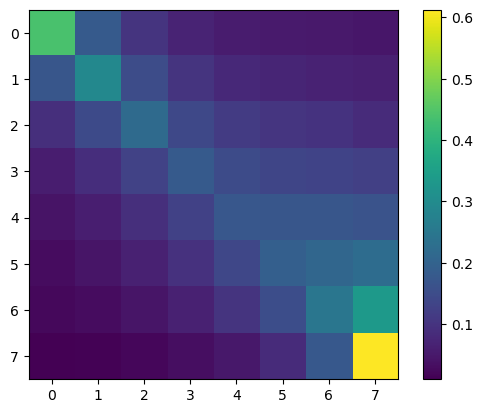

In [5]:
row_sums = cov.sum(axis=1)
new_matrix = cov / row_sums[:, np.newaxis]

plt.imshow(new_matrix)
plt.colorbar()
plt.show()